In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%pylab inline

from datetime import datetime,timedelta
import json
import re

from collections import OrderedDict
from math import pi
import pytz
import time
#import psycopg2
#from sqlalchemy import create_engine

from scipy import stats
import csv

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('balanced_data.csv')
data_im = pd.read_csv('imbalanced_data.csv')

/Users/linda/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.ix[0,:]

advertiser_app_store_id                                  1009442510
country_code                                                     CN
city                                                            NaN
campaign_id                                56fc3b248409c5677800005c
creative_id                                582efacc4156ab1024000034
device_language                                                  zh
device_make                                                   iPad3
device_model                                                      4
device_platform                                                 iOS
device_connection                                              wifi
device_os_version                                              10.2
device_screen_height                                           2048
device_screen_width                                            1536
device_volume                                                 0.375
event_id                                   58674

In [4]:
data.shape

(700000, 27)

In [5]:
for col in data.columns:
    print col, len(data[col].unique())

advertiser_app_store_id 841
country_code 219
city 7510
campaign_id 3927
creative_id 8835
device_language 143
device_make 2880
device_model 19976
device_platform 3
device_connection 3
device_os_version 167
device_screen_height 636
device_screen_width 636
device_volume 25736
event_id 667229
n_campaign_views 353
n_vungle_installs 27
publisher_app_store_id 10581
time_of_last_delivery_this_campaign 322105
time_of_last_delivery_this_creative 236890
time_of_last_delivery_any_installed_app 76948
time_of_last_vungle_delivery 395389
time_of_this_impression 295092
timestamp_at_install 206495
time_of_this_request 344952
time_zone 402
is_install 2


In [6]:
data_install = data[data['is_install'] == 1]
data_install.head()

,advertiser_app_store_id,country_code,city,campaign_id,creative_id,device_language,device_make,device_model,device_platform,device_connection,...,publisher_app_store_id,time_of_last_delivery_this_campaign,time_of_last_delivery_this_creative,time_of_last_delivery_any_installed_app,time_of_last_vungle_delivery,time_of_this_impression,timestamp_at_install,time_of_this_request,time_zone,is_install
50000,57a0c2d7b019f8257c00018e,US,NaN,58580e0349704450630005c0,585be882a41b0d391e000189,en,iPhone8,1,iOS,wifi,...,5645ea34d86cc1d66200000e,2016-12-28 03:18:43,2016-12-28 03:18:43,NaN,2016-12-28 03:18:43,2016-12-29 00:54:02,2016-12-29 00:58:25,2016-12-29 00:48:36,America/New_York,1
50001,567ad7406fd13e0b3500010a,CN,NaN,5745febecdbfecf93000017a,578cf54e6f796f6f080000e5,zh,iPhone8,4,iOS,wifi,...,58085b5dd7b68f0448000053,NaN,NaN,NaN,2016-12-29 06:07:48,2016-12-29 06:37:02,2016-12-29 06:49:08,2016-12-29 06:25:35,Asia/Shanghai,1
50002,638689075,CN,NaN,579713697e12833b60000107,5616630eaf32fc6e0d000052,zh,iPad6,3,iOS,wifi,...,582980902ab2e27710000205,NaN,NaN,2016-12-27 13:25:11,2016-12-30 02:12:10,2016-12-30 10:30:02,2016-12-30 13:35:27,2016-12-30 02:49:11,Asia/Shanghai,1
50003,57c14f1a8992b76d750000d4,PA,NaN,584a20dea389cb6c03000015,585a3120b4e7236d220002cd,es,LGE,LG-H540,android,wifi,...,581c02c0487a7c024d00000f,NaN,NaN,NaN,2016-12-16 16:39:11,2016-12-29 22:49:56,2016-12-29 22:55:29,2016-12-28 21:55:46,America/Panama,1
50004,585072c6c8bc669419000086,US,NaN,58581838bd485a0a4a000536,585c10bea41b0d391e0001a4,en,Lenovo,Lenovo TB3-710F,android,wifi,...,5759e66aab7f59142500007d,2016-12-25 05:07:26,NaN,NaN,2016-12-25 05:07:26,2016-12-30 19:27:39,2016-12-30 21:55:52,2016-12-26 01:28:33,America/Los_Angeles,1


In [7]:
data_install_im = data_im[data_im['is_install'] == 1]
data_install_im.head()

,advertiser_app_store_id,country_code,city,campaign_id,creative_id,device_language,device_make,device_model,device_platform,device_connection,...,publisher_app_store_id,time_of_last_delivery_this_campaign,time_of_last_delivery_this_creative,time_of_last_delivery_any_installed_app,time_of_last_vungle_delivery,time_of_this_impression,timestamp_at_install,time_of_this_request,time_zone,is_install
2,58534782688691e41e000011,GB,NaN,5853f654b70cc2893e000031,5860c91d156bf31f650001b0,en,iPhone3,1,iOS,wifi,...,5645ea34d86cc1d66200000e,2016-12-26 20:17:33,2016-12-26 20:17:33,NaN,2016-12-28 12:48:47,2016-12-29 13:01:48,2016-12-29 13:12:29,2016-12-29 12:59:07,Europe/London,1
5,569cb43b42e28de607000008,VN,NaN,569cb47434fc89f17a00000e,57b3fd6bf80d026d7300007b,vi,samsung,SM-J320G,android,wifi,...,com.playappking.busrush,2016-12-18 09:46:32,2016-12-18 09:46:32,NaN,2016-12-29 12:01:47,2017-01-01 03:10:55,2017-01-01 03:14:11,2017-01-01 03:08:59,Asia/Ho_Chi_Minh,1
13,585215f054dbb89701000ba2,US,NaN,585247d492f308b72a00015a,5860bde8156bf31f65000198,zh,Meizu,m3,android,wifi,...,569c5302cd0685ea45000008,NaN,NaN,NaN,2016-12-31 11:30:30,2016-12-31 13:38:21,2016-12-31 13:41:14,2016-12-31 11:51:19,America/New_York,1
18,1009442510,US,NaN,57511f92e410603d0b00000f,5817c654559b5edd2d00006c,en,iPod7,1,iOS,wifi,...,836071680,NaN,NaN,NaN,NaN,2016-12-31 16:46:04,2016-12-31 22:54:46,2016-12-31 15:40:22,America/New_York,1
21,5796ce353214d8315f000088,US,NaN,5797212313f0bb443d00010f,5808eedf9534c1c615000173,en,samsung,SAMSUNG-SM-G891A,android,mobile,...,52b7d6c4108fe8347200000a,NaN,NaN,2016-12-29 04:05:01,2016-12-30 12:16:33,2016-12-30 14:38:21,2016-12-30 16:12:25,2016-12-30 12:17:34,America/Chicago,1


### Conversion  = install / total


### advertiser_app_store_id

In [8]:
ins = pd.DataFrame(data_install.groupby('advertiser_app_store_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('advertiser_app_store_id')['is_install'].count().rename('total_counts')).reset_index()
counts_ad = total.merge(ins, how = 'left', on = 'advertiser_app_store_id').fillna(0.0)
counts_ad['conversion'] = counts_ad['install_counts']/counts_ad['total_counts']

In [9]:
#find the labels that have conversion rate greater then 0.5 and more than one time install
sub_count_ad=counts_ad[(counts_ad.install_counts>1)&(counts_ad.conversion>0.5)]
print 'the size of important label in a balanced data group', len(sub_count_ad)


the size of important label in a balanced data group 182


In [10]:
ins_im = pd.DataFrame(data_install_im.groupby('advertiser_app_store_id')['is_install'].count().rename('install_counts')).reset_index()
total_im = pd.DataFrame(data_im.groupby('advertiser_app_store_id')['is_install'].count().rename('total_counts')).reset_index()
counts_ad_im = total_im.merge(ins_im, how = 'left', on = 'advertiser_app_store_id').fillna(0.0)
counts_ad_im['conversion'] = counts_ad_im['install_counts']/counts_ad_im['total_counts']


In [11]:
#find the labels that have conversion rate greater then 0.5 and more than one time install
sub_count_ad_im=counts_ad_im[(counts_ad_im.install_counts>1)&(counts_ad_im.conversion>0.2)]
print 'the size of important label in a imbalanced data group', len(sub_count_ad_im)


the size of important label in a imbalanced data group 183


In [12]:
print 'The number of important label shared by imbalanced data group and balanced data group is ',len(set(sub_count_ad.advertiser_app_store_id.values)&set(sub_count_ad_im.advertiser_app_store_id.values))

The number of important label shared by imbalanced data group and balanced data group is  153


In [13]:
counts_ad_im['conversion'].value_counts()

0.000000    226
0.500000     11
0.062500      7
1.000000      7
0.125000      5
0.080000      5
0.111111      5
0.166667      5
0.250000      4
0.071429      4
0.047619      4
0.133333      3
0.333333      3
0.120000      3
0.200000      3
0.096154      3
0.043478      3
0.187500      3
0.076923      2
0.138889      2
0.090909      2
0.093750      2
0.040000      2
0.117647      2
0.066667      2
0.057692      2
0.105263      2
0.142857      2
0.222222      2
0.230769      2
           ... 
0.101695      1
0.028169      1
0.195000      1
0.066311      1
0.116216      1
0.179420      1
0.004149      1
0.008333      1
0.276923      1
0.185507      1
0.110497      1
0.490195      1
0.112840      1
0.205479      1
0.163488      1
0.173077      1
0.268423      1
0.174603      1
0.177215      1
0.045752      1
0.046380      1
0.093651      1
0.147826      1
0.048780      1
0.061135      1
0.105096      1
0.094595      1
0.281623      1
0.106443      1
0.081599      1
Name: conversion, dtype:

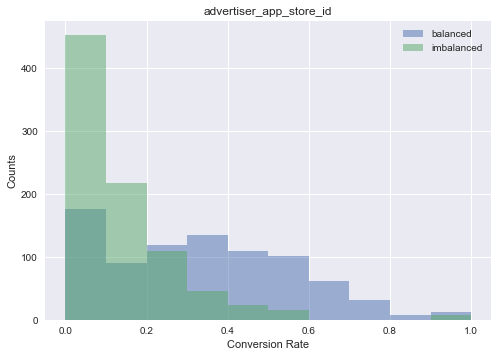

In [14]:
plt.hist(counts_ad['conversion'],alpha=0.5,label='balanced')
plt.hist(counts_ad_im['conversion'],alpha=0.5,label='imbalanced')
plt.xlabel('Conversion Rate')
plt.legend()
plt.ylabel('Counts')
plt.title('advertiser_app_store_id')

### country_code

In [15]:
ins = pd.DataFrame(data_install.groupby('country_code')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('country_code')['is_install'].count().rename('total_counts')).reset_index()
counts_country = total.merge(ins, how = 'left', on = 'country_code').fillna(0.0)
counts_country['conversion'] = counts_country['install_counts']/counts_country['total_counts']

In [16]:
sub_count_country=counts_country[(counts_country.conversion>0.5)]
print 'the size of important label in a imbalanced data group', len(sub_count_country)


the size of important label in a imbalanced data group 29


In [17]:
ins_im = pd.DataFrame(data_install_im.groupby('country_code')['is_install'].count().rename('install_counts')).reset_index()
total_im = pd.DataFrame(data_im.groupby('country_code')['is_install'].count().rename('total_counts')).reset_index()
counts_country_im = total_im.merge(ins_im, how = 'left', on = 'country_code').fillna(0.0)
counts_country_im['conversion'] = counts_ad_im['install_counts']/counts_ad_im['total_counts']


In [18]:
sub_count_country_im=counts_country_im[(counts_country_im.conversion>0.2)]
print 'the size of important label in a imbalanced data group', len(sub_count_country_im)


the size of important label in a imbalanced data group 67


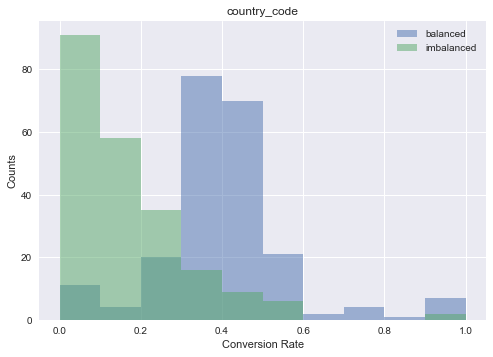

In [27]:
plt.hist(counts_country['conversion'],alpha=0.5,label='balanced')
plt.hist(counts_country_im['conversion'],alpha=0.5,label='imbalanced')
plt.xlabel('Conversion Rate')
plt.ylabel('Counts')
plt.legend()
plt.title('country_code')

### campaign_id <- useless

In [41]:
ins = pd.DataFrame(data_install.groupby('campaign_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('campaign_id')['is_install'].count().rename('total_counts')).reset_index()
counts_campaign_id = total.merge(ins, how = 'left', on = 'campaign_id').fillna(0.0)
counts_campaign_id['conversion'] = counts_campaign_id['install_counts']/counts_campaign_id['total_counts']

In [42]:
counts_campaign_id.sort_values('conversion', ascending = False).head()

,campaign_id,total_counts,install_counts,conversion
0,51328f29a80c3f2b340000f6,1,1.0,1.0
2197,580a7615d7cfd36123000088,2,2.0,1.0
3260,584673b8eaaaa0e56900007f,7,7.0,1.0
3261,584674870c880c2c2200006c,1,1.0,1.0
3278,5847a2752d9cadbb64000264,1,1.0,1.0


### creative_id  <- useless

In [43]:
ins = pd.DataFrame(data_install.groupby('creative_id')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('creative_id')['is_install'].count().rename('total_counts')).reset_index()
counts_creative_id = total.merge(ins, how = 'left', on = 'creative_id').fillna(0.0)
counts_creative_id['conversion'] = counts_creative_id['install_counts']/counts_creative_id['total_counts']
counts_creative_id.sort_values('conversion', ascending = False).head()

,creative_id,total_counts,install_counts,conversion
3498,57edc530bb47ff4937000022,2,2.0,1.0
7682,585a3baed39d867f22000213,1,1.0,1.0
882,56d93a4a61c7bd786d000074,2,2.0,1.0
2285,57aa4bbb316ce33d770000a5,1,1.0,1.0
7676,585a3153b5ed234c1e0000fa,4,4.0,1.0


### device_language

In [21]:
data['device_language'] = data['device_language'].apply(lambda x: str(x).lower().split('-')[0])
data_install['device_language'] = data_install['device_language'].apply(lambda x: str(x).lower().split('-')[0])

/Users/linda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
data_im['device_language'] = data_im['device_language'].apply(lambda x: str(x).lower().split('-')[0])
data_install_im['device_language'] = data_install_im['device_language'].apply(lambda x: str(x).lower().split('-')[0])

/Users/linda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
ins = pd.DataFrame(data_install.groupby('device_language')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_language')['is_install'].count().rename('total_counts')).reset_index()
counts_language = total.merge(ins, how = 'left', on = 'device_language').fillna(0.0)
counts_language['conversion'] = counts_language['install_counts']/counts_language['total_counts']


In [24]:
sub_count_language=counts_language[(counts_language.conversion>0.5)]
print 'the size of important label in a imbalanced data group', len(sub_count_language)

the size of important label in a imbalanced data group 22


In [25]:
ins_im = pd.DataFrame(data_install_im.groupby('device_language')['is_install'].count().rename('install_counts')).reset_index()
total_im = pd.DataFrame(data_im.groupby('device_language')['is_install'].count().rename('total_counts')).reset_index()
counts_language_im = total_im.merge(ins_im, how = 'left', on = 'device_language').fillna(0.0)
counts_language_im['conversion'] = counts_ad_im['install_counts']/counts_ad_im['total_counts']

In [50]:
sub_count_language_im=counts_language_im[(counts_language_im.conversion>0.2)]
print 'the size of important label in a imbalanced data group', len(sub_count_language_im)

the size of important label in a imbalanced data group 35


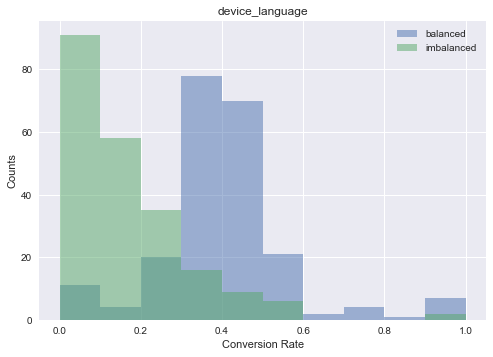

In [26]:
plt.hist(counts_country['conversion'],alpha=0.5,label='balanced')
plt.hist(counts_country_im['conversion'],alpha=0.5,label='imbalanced')
plt.xlabel('Conversion Rate')
plt.ylabel('Counts')
plt.legend()
plt.title('device_language')

### device_make <- useless

In [36]:
ins = pd.DataFrame(data_install.groupby('device_make')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_make')['is_install'].count().rename('total_counts')).reset_index()
counts_device_make = total.merge(ins, how = 'left', on = 'device_make').fillna(0.0)
counts_device_make['conversion'] = counts_device_make['install_counts']/counts_device_make['total_counts']
counts_device_make.sort_values('conversion', ascending = False)

### device_model <- useless

In [59]:
ins = pd.DataFrame(data_install.groupby('device_model')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_model')['is_install'].count().rename('total_counts')).reset_index()
counts_device_model = total.merge(ins, how = 'left', on = 'device_model').fillna(0.0)
counts_device_model['conversion'] = counts_device_model['install_counts']/counts_device_model['total_counts']
counts_device_model.sort_values('conversion', ascending = False)

,device_model,total_counts,install_counts,conversion
2367,Allure Ultra,1,1.0,1.0
10762,N5D,1,1.0,1.0
10803,N9006,1,1.0,1.0
10800,N9000,1,1.0,1.0
10798,N9,1,1.0,1.0
10796,N8800,2,2.0,1.0
10795,N861,1,1.0,1.0
10787,N788_BASHA,1,1.0,1.0
2930,AvenzoTAB9,1,1.0,1.0
10785,N76VJ,1,1.0,1.0


### device_platform

In [60]:
ins = pd.DataFrame(data_install.groupby('device_platform')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_platform')['is_install'].count().rename('total_counts')).reset_index()
counts_device_platform = total.merge(ins, how = 'left', on = 'device_platform').fillna(0.0)
counts_device_platform['conversion'] = counts_device_platform['install_counts']/counts_device_platform['total_counts']
counts_device_platform.sort_values('conversion', ascending = False)

,device_platform,total_counts,install_counts,conversion
1,iOS,290427,157941,0.543823
2,windows,11785,5545,0.470513
0,android,397788,186514,0.468878


In [52]:
ins = pd.DataFrame(data_install_im.groupby('device_platform')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data_im.groupby('device_platform')['is_install'].count().rename('total_counts')).reset_index()
counts_device_platform_im = total.merge(ins, how = 'left', on = 'device_platform').fillna(0.0)
counts_device_platform_im['conversion'] = counts_device_platform_im['install_counts']/counts_device_platform_im['total_counts']
counts_device_platform_im.sort_values('conversion', ascending = False)

,device_platform,total_counts,install_counts,conversion
1,iOS,273660,60525,0.221169
2,windows,12095,2124,0.175610
0,android,414245,72400,0.174776


(0, 0.6)

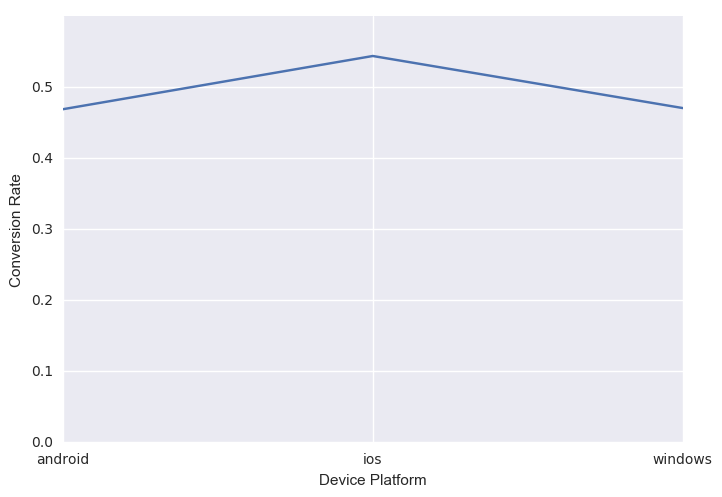

In [106]:
plt.plot(counts_device_platform['conversion'])
plt.xticks(range(3), ['android', 'ios', 'windows'])
plt.xlabel('Device Platform')
plt.ylabel('Conversion Rate')
plt.ylim(0,0.6)

### device_connection

In [61]:
ins = pd.DataFrame(data_install.groupby('device_connection')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('device_connection')['is_install'].count().rename('total_counts')).reset_index()
counts_device_connection = total.merge(ins, how = 'left', on = 'device_connection').fillna(0.0)
counts_device_connection['conversion'] = counts_device_connection['install_counts']/counts_device_connection['total_counts']
counts_device_connection.sort_values('conversion', ascending = False)

,device_connection,total_counts,install_counts,conversion
1,wifi,510226,252602,0.495079
0,mobile,137870,67821,0.491920


(0.4, 0.5)

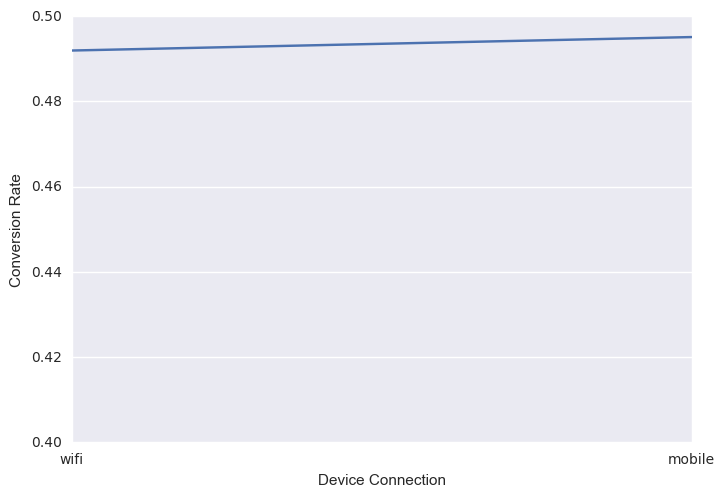

In [110]:
plt.plot(counts_device_connection['conversion'])
plt.xticks(range(2), ['wifi', 'mobile'])
plt.xlabel('Device Connection')
plt.ylabel('Conversion Rate')
plt.ylim(0.4,0.5)

### n_campaign_views

In [34]:
ins = pd.DataFrame(data_install.groupby('n_campaign_views')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('n_campaign_views')['is_install'].count().rename('total_counts')).reset_index()
counts_views = total.merge(ins, how = 'left', on = 'n_campaign_views').fillna(0.0)
counts_views['conversion'] = counts_views['install_counts']/counts_views['total_counts']
counts_views.sort_values('conversion', ascending = False).head()

,n_campaign_views,total_counts,install_counts,conversion
212,214,1,1.0,1.000000
308,425,1,1.0,1.000000
0,0,420645,240391.0,0.571482
254,276,2,1.0,0.500000
1,1,119687,57670.0,0.481840


In [31]:
ins = pd.DataFrame(data_install_im.groupby('n_campaign_views')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data_im.groupby('n_campaign_views')['is_install'].count().rename('total_counts')).reset_index()
counts_views_im = total.merge(ins, how = 'left', on = 'n_campaign_views').fillna(0.0)
counts_views_im['conversion'] = counts_views_im['install_counts']/counts_views_im['total_counts']
#counts_views.sort_values('conversion', ascending = False)

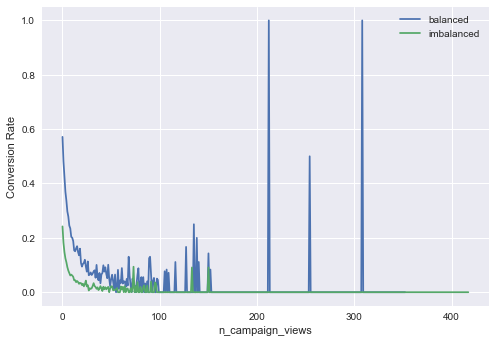

In [36]:
plt.plot(range(counts_views.shape[0]), counts_views['conversion'],label='balanced')
plt.plot(range(counts_views_im.shape[0]), counts_views_im['conversion'],label='imbalanced')
plt.xlabel('n_campaign_views')
plt.legend()
plt.ylabel('Conversion Rate')

### time zone

In [124]:
data['time_zone']

0               Asia/Shanghai
1               Asia/Makassar
2             America/Toronto
3                Asia/Bangkok
4               Europe/Prague
5               Asia/Shanghai
6           America/Sao_Paulo
7            America/New_York
8            America/New_York
9             America/Detroit
10           America/Mazatlan
11           America/New_York
12            America/Halifax
13              Europe/Berlin
14             Asia/Jerusalem
15           America/New_York
16           America/New_York
17           America/New_York
18              Asia/Shanghai
19               Asia/Kolkata
20           Europe/Bucharest
21                 Asia/Tokyo
22          America/Sao_Paulo
23            America/Chicago
24               Europe/Paris
25          America/Guayaquil
26        America/Los_Angeles
27           America/New_York
28              Europe/London
29           America/New_York
                 ...         
699970        America/Chicago
699971          Europe/London
699972    

In [54]:
def get_continent(x):
    if len(str(x).split('/')) > 1:
        return str(x).split('/')[0]
    else:
        return None
    
def get_city(x):
    if len(str(x).split('/')) > 1:
        return str(x).split('/')[1]
    else:
        return str(x).split('/')[0]

In [55]:
data['time_zone_continent'] = data['time_zone'].apply(lambda x: get_continent(x))
data_install['time_zone_continent'] = data_install['time_zone'].apply(lambda x: get_continent(x))
data_im['time_zone_continent'] = data_im['time_zone'].apply(lambda x: get_continent(x))
data_install_im['time_zone_continent'] = data_install_im['time_zone'].apply(lambda x: get_continent(x))

/Users/linda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/linda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [166]:
data[data['time_zone_continent'] == 'Indian'] = 'Asia'
data_install[data_install['time_zone_continent'] == 'Indian']['time_zone_continent'] = 'Asia'

/Users/amiee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
ins = pd.DataFrame(data_install.groupby('time_zone_continent')['is_install'].count().rename('install_counts')).reset_index()
total = pd.DataFrame(data.groupby('time_zone_continent')['is_install'].count().rename('total_counts')).reset_index()
counts_continent = total.merge(ins, how = 'left', on = 'time_zone_continent').fillna(0.0)
counts_continent['conversion'] = counts_continent['install_counts']/counts_continent['total_counts']
counts_continent.sort_values('conversion', ascending = False)

,time_zone_continent,total_counts,install_counts,conversion
6,Australia,10555,6019.0,0.570251
1,America,310177,172348.0,0.555644
10,Pacific,4305,2094.0,0.486411
4,Asia,170653,79501.0,0.465863
8,Europe,190126,84159.0,0.442649
5,Atlantic,1471,629.0,0.427600
0,Africa,8488,3539.0,0.416942
7,Etc,3557,1481.0,0.416362
9,Indian,343,138.0,0.402332
2,Antarctica,108,43.0,0.398148


In [60]:
ins_im = pd.DataFrame(data_install_im.groupby('time_zone_continent')['is_install'].count().rename('install_counts')).reset_index()
total_im = pd.DataFrame(data_im.groupby('time_zone_continent')['is_install'].count().rename('total_counts')).reset_index()
counts_continent_im = total_im.merge(ins_im, how = 'left', on = 'time_zone_continent').fillna(0.0)
counts_continent_im['conversion'] = counts_continent_im['install_counts']/counts_continent_im['total_counts']
counts_continent_im.sort_values('conversion', ascending = False)

,time_zone_continent,total_counts,install_counts,conversion
6,Australia,9525,2336.0,0.245249
1,America,289400,66602.0,0.230138
10,Pacific,4338,771.0,0.177732
4,Asia,176421,30783.0,0.174486
8,Europe,204531,32444.0,0.158626
2,Antarctica,133,20.0,0.150376
9,Indian,434,63.0,0.145161
5,Atlantic,1628,235.0,0.144349
0,Africa,9346,1269.0,0.135780
7,Etc,3974,514.0,0.129341


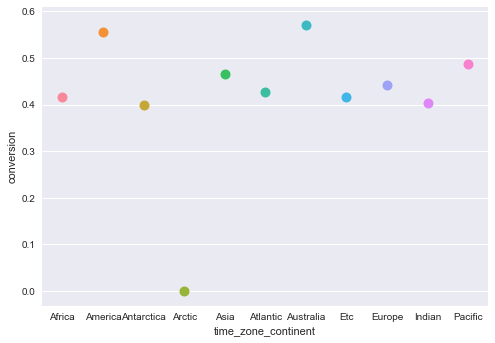

In [59]:
sns.stripplot(x="time_zone_continent", y="conversion", data=counts_continent,size=10)

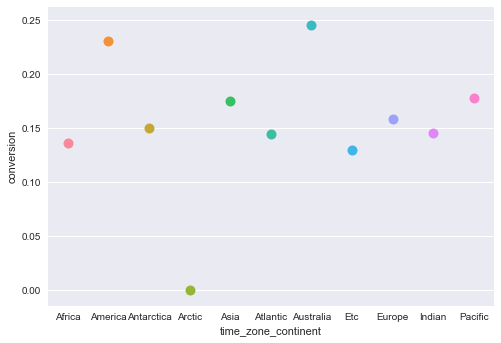

In [61]:
sns.stripplot(x="time_zone_continent", y="conversion", data=counts_continent_im,size=10)